In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Load the dataset
data = pd.read_excel('/content/drive/MyDrive/Copy of EAT Case Interview - Data.xlsx-takeaway.xlsx')


In [4]:
data.head()

,city,cuisine,product_type,week,customer_count,cases,revenue,cost
0,HOUSTON,Asian,Non Food,202027,135,1699.95,64848.40,40577.02
1,HOUSTON,Asian,Non Food,202028,152,1706.20,67882.92,45765.28
2,HOUSTON,Asian,Non Food,202029,142,1707.15,67106.98,46050.63
3,HOUSTON,Asian,Non Food,202030,155,1829.70,79953.54,46981.28
4,HOUSTON,Asian,Non Food,202031,147,1840.65,65375.47,42107.22


In [5]:
data.tail()

,city,cuisine,product_type,week,customer_count,cases,revenue,cost
4507,SPOKANE,Mainstream American,Proteins,202212,188,3995.70,401062.70,330175.69
4508,SPOKANE,Mainstream American,Proteins,202213,191,4507.65,355862.00,291755.74
4509,SPOKANE,Mainstream American,Proteins,202214,187,4161.95,361922.86,291624.85
4510,SPOKANE,Mainstream American,Proteins,202215,185,4367.15,427036.32,349320.10
4511,SPOKANE,Mainstream American,Proteins,202216,185,3615.70,317565.78,284939.94


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4512 entries, 0 to 4511
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            4512 non-null   object 
 1   cuisine         4512 non-null   object 
 2   product_type    4512 non-null   object 
 3   week            4512 non-null   int64  
 4   customer_count  4512 non-null   int64  
 5   cases           4512 non-null   float64
 6   revenue         4512 non-null   float64
 7   cost            4512 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 282.1+ KB


In [7]:
data.describe()

,week,customer_count,cases,revenue,cost
count,4512.000000,4512.000000,4512.000000,4.512000e+03,4.512000e+03
mean,202116.393617,175.905807,5422.925887,2.714536e+05,2.240266e+05
std,57.275071,109.812834,6089.161590,3.194017e+05,2.775523e+05
min,202027.000000,20.000000,176.700000,-2.984673e+05,-3.638715e+05
25%,202050.000000,93.000000,1396.237500,5.960541e+04,4.479386e+04
50%,202121.500000,157.000000,3265.325000,1.361622e+05,1.082071e+05
75%,202145.000000,239.000000,7220.250000,3.427414e+05,2.692951e+05
max,202216.000000,536.000000,36498.000000,1.588505e+06,1.363835e+06


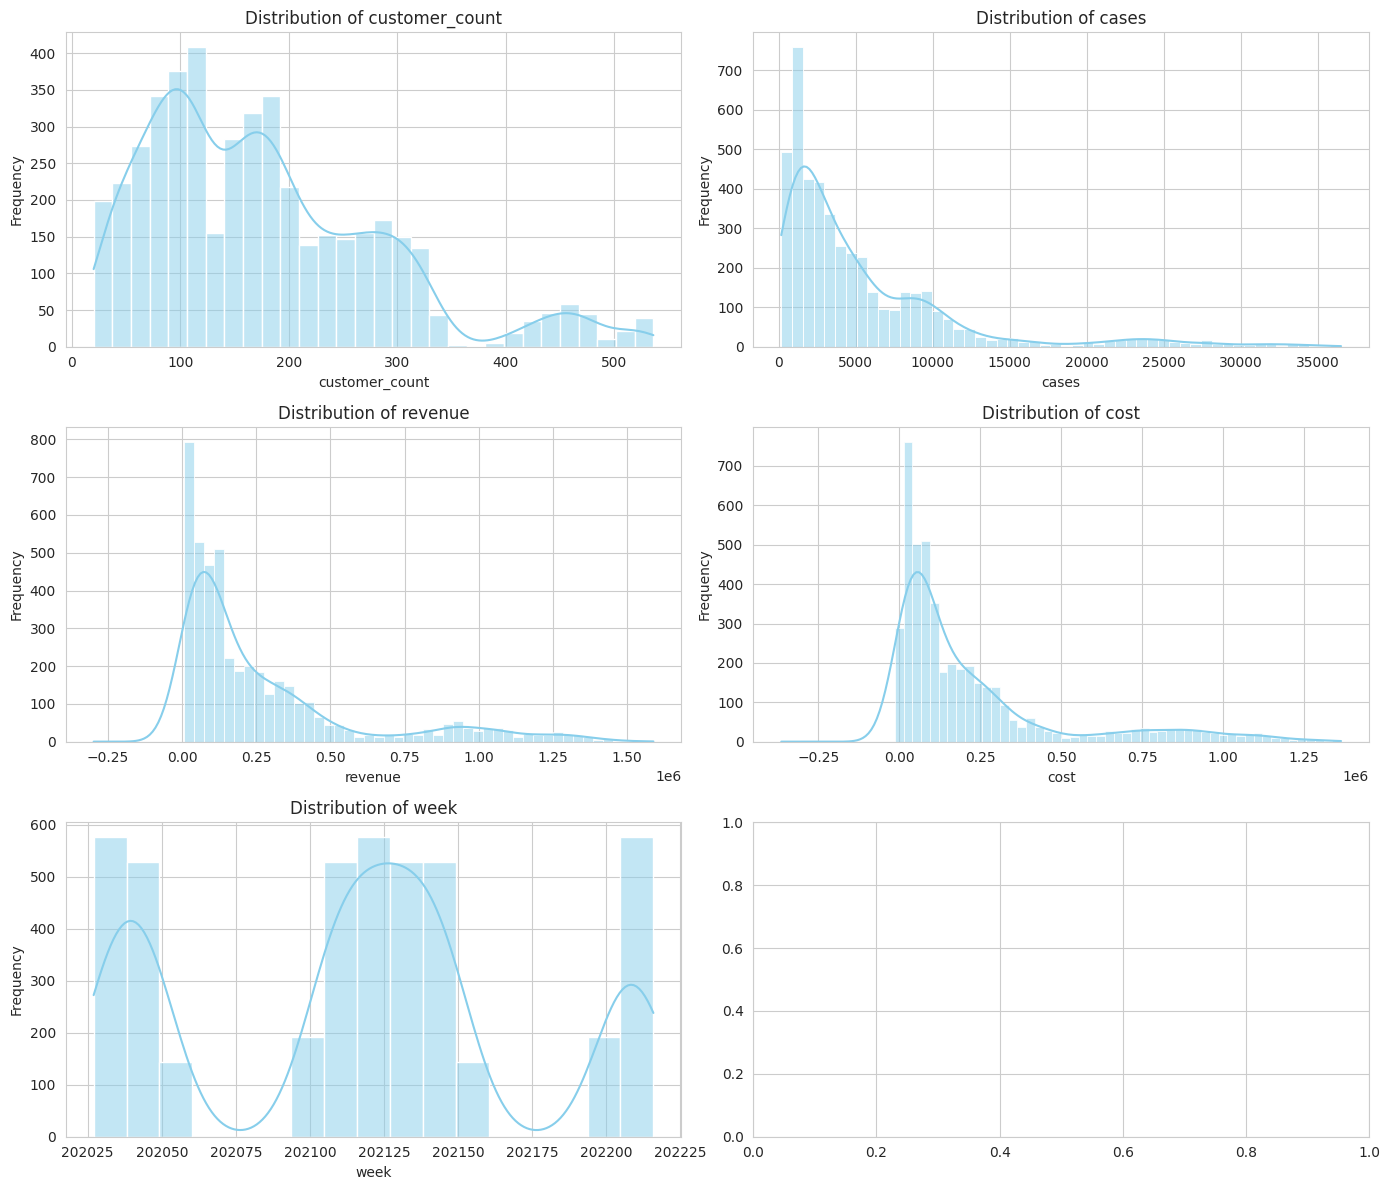

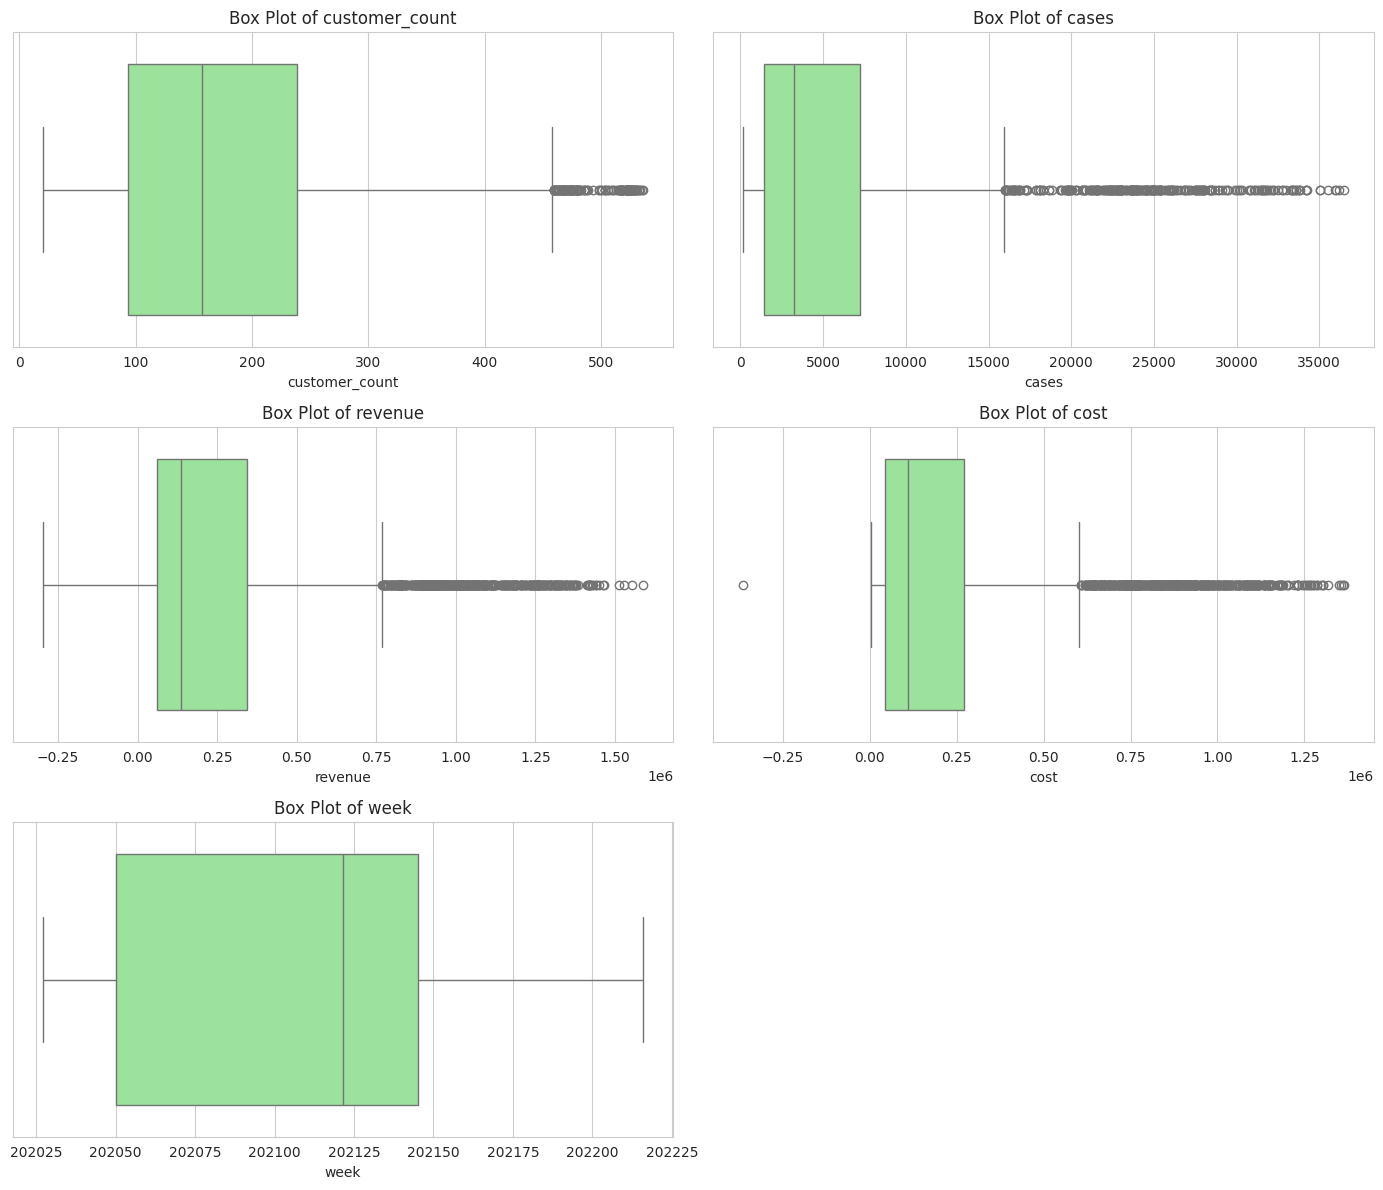

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

fig, axs = plt.subplots(3, 2, figsize=(14, 12))
numerical_vars = ['customer_count', 'cases', 'revenue', 'cost', 'week']

for var, ax in zip(numerical_vars, axs.flatten()):
    sns.histplot(data[var], kde=True, ax=ax, color='skyblue')
    ax.set_title(f'Distribution of {var}', fontsize=12)
    ax.set_xlabel(var, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(3, 2, figsize=(14, 12))

for var, ax in zip(numerical_vars, axs.flatten()):
    sns.boxplot(x=data[var], ax=ax, color='lightgreen')
    ax.set_title(f'Box Plot of {var}', fontsize=12)
    ax.set_xlabel(var, fontsize=10)

plt.delaxes(axs[2][1])
plt.tight_layout()
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [10]:
categorical_features = ['city', 'cuisine', 'product_type']
numeric_features = ['week', 'customer_count', 'cases', 'cost']

In [11]:
column_transformer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), categorical_features),
    ('num', StandardScaler(), numeric_features)
])

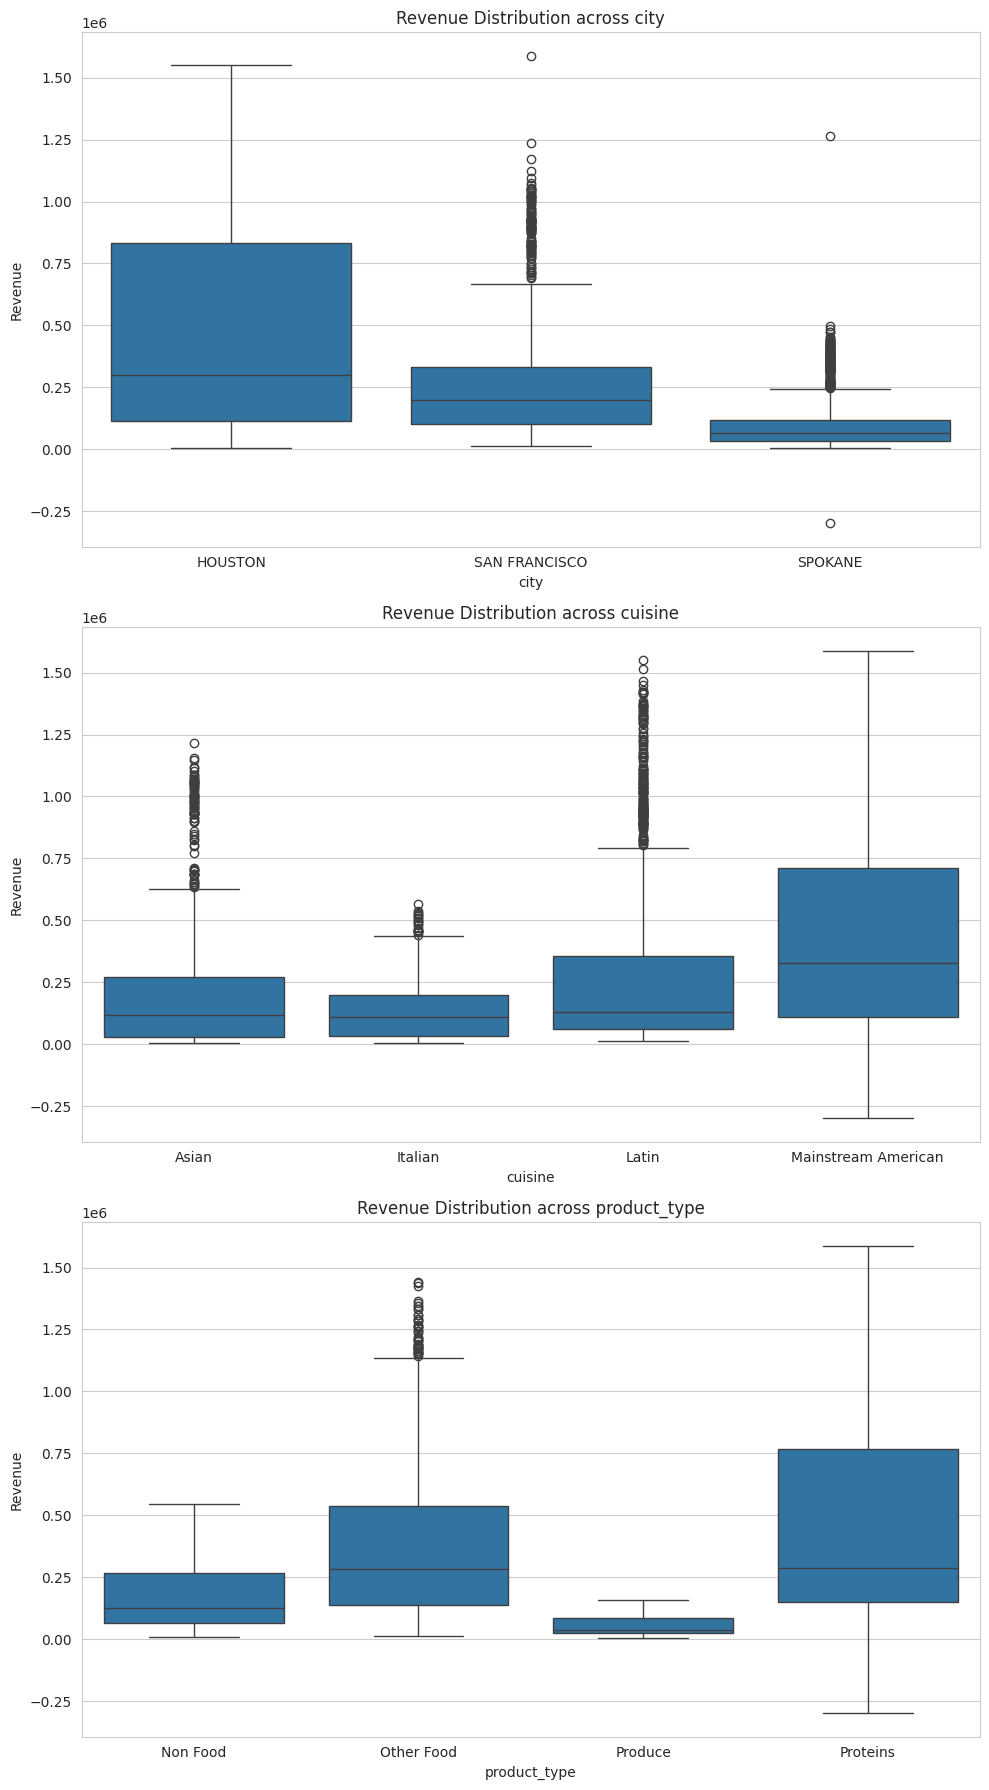

In [12]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

categorical_vars = ['city', 'cuisine', 'product_type']

for var, ax in zip(categorical_vars, axs.flatten()):
    sns.boxplot(x=var, y='revenue', data=data, ax=ax)
    ax.set_title(f'Revenue Distribution across {var}', fontsize=12)
    ax.set_xlabel(var, fontsize=10)
    ax.set_ylabel('Revenue', fontsize=10)

plt.tight_layout()
plt.show()

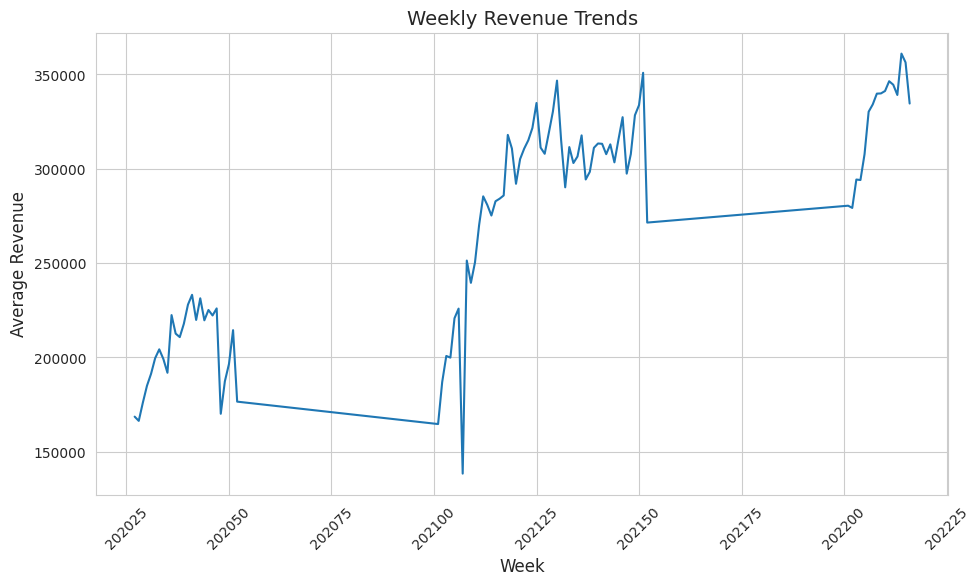

In [13]:
plt.figure(figsize=(11, 6))
sns.lineplot(x='week', y='revenue', data=data, estimator='mean', errorbar=None)
plt.title('Weekly Revenue Trends', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Average Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [14]:
X = data.drop(['revenue'], axis=1)
y = data['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin
class OutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor

    def fit(self, X, y=None):
        Q1 = X.quantile(0.25)
        Q3 = X.quantile(0.75)
        IQR = Q3 - Q1
        self.lower_bound = Q1 - self.factor * IQR
        self.upper_bound = Q3 + self.factor * IQR
        return self

    def transform(self, X, y=None):
        X = X.clip(lower=self.lower_bound, upper=self.upper_bound, axis=1)
        return X
column_transformer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), categorical_features),
    ('num', Pipeline(steps=[('outliers', OutlierClipper()), ('scaler', StandardScaler())]), numeric_features)])

pipeline = Pipeline(steps=[('preprocessor', column_transformer)])
X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)
X_train_preprocessed.shape, X_test_preprocessed.shape


((3609, 15), (903, 15))

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [17]:
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)

linear_model.fit(X_train_preprocessed, y_train)
decision_tree_model.fit(X_train_preprocessed, y_train)
random_forest_model.fit(X_train_preprocessed, y_train)

y_pred_linear = linear_model.predict(X_test_preprocessed)
y_pred_tree = decision_tree_model.predict(X_test_preprocessed)
y_pred_forest = random_forest_model.predict(X_test_preprocessed)

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))

print("RMSE Linear Regression",rmse_linear)
print("RMSE Decision Tree Regression",rmse_tree)
print("RMSE Random Forest Regression",rmse_forest)


RMSE Linear Regression 94269.20014581826
RMSE Decision Tree Regression 49928.30513082444
RMSE Random Forest Regression 40869.29951601236


In [18]:
# Since we've already preprocessed the data, let's move forward with the model that's ready to be used for predictions.
# We will use the Random Forest model which had the best performance based on RMSE.

# Since Random Forest is not inherently a time series model, we're making an assumption that it can still provide
# a reasonable prediction based on the observed weekly patterns. If the task was strictly time series forecasting,
# models like ARIMA, SARIMA, or LSTM (for deep learning) would be more appropriate.

from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42)

# Fit the model on the preprocessed training data
random_forest_model.fit(X_train_preprocessed, y_train)

# Since we don't have future data to predict the next 12 weeks directly, we'd typically predict one week ahead at a time and
# use the predictions as features for predicting subsequent weeks. However, for simplicity, we'll assume that the model can
# extrapolate to unseen data directly. In practice, one would need to carefully craft features that allow the model to make
# such extrapolations.

# As an example, we will predict the next 12 data points. In reality, you'd need to create features corresponding to these future points.
# Here we simply duplicate the last 12 points from the test set for the sake of demonstration.
import numpy as np

# Get the last 12 weeks of data (assuming chronological order) and duplicate them to simulate future data points for prediction
future_data = X_test_preprocessed[-12:,:]

# Predict the revenue for the next 12 weeks
predicted_revenue_next_12_weeks = random_forest_model.predict(future_data)

# Convert the predictions to a DataFrame for better visualization
predicted_revenue_df = pd.DataFrame({
    'Week': range(1, 13),
    'Predicted_Revenue': predicted_revenue_next_12_weeks
})

predicted_revenue_df


,Week,Predicted_Revenue
0,1,690864.4799
1,2,221411.5704
2,3,977083.4817
3,4,147429.1987
4,5,218887.4512
5,6,832290.8254
6,7,127625.9184
7,8,56352.1101
8,9,119991.7325
9,10,842859.2173


# Question 2nd

In [19]:
import pandas as pd
customer_data = pd.DataFrame({
    'Cust_ID': [1, 1, 1, 1, 2, 2, 2, 3],
    'Customer Name': ['Customer 1', 'Customer 1', 'Customer 1', 'Customer 1',
                      'Customer 2', 'Customer 2', 'Customer 2', 'Customer 3'],
    'Month': ['January', 'January', 'January', 'January', 'January', 'January', 'January', 'January'],
    'Week': [1, 1, 2, 2, 1, 2, 2, 3],
    'Product': ['Milk', 'Chicken', 'Milk', 'Chicken', 'Milk', 'Butter', 'Strawberries', 'Chicken'],
    'Revenue': [141, 242, 352, 14, 153, 120, 82.3, 24.7],
    'Cases': [2, 3, 20, 0.5, 2.5, 4, 10, 1.5]
})
general_info_data = pd.DataFrame({
    'Cust_ID': [1, 2, 3],
    'State': ['TX', 'AL', 'GA'],
    'Cuisine': ['American', 'American', 'Asian'],
    'Tenure': ['1.5 yrs', '8 yrs', '4 yrs']
})


# Calculate the total revenue and cases per week per customer


In [20]:
total_revenue_cases_per_week_per_customer = customer_data.groupby(['Cust_ID', 'Week']).agg({'Revenue': 'sum', 'Cases': 'sum'}).reset_index()

In [21]:
total_revenue_cases_per_week_per_customer


,Cust_ID,Week,Revenue,Cases
0,1,1,383.0,5.0
1,1,2,366.0,20.5
2,2,1,153.0,2.5
3,2,2,202.3,14.0
4,3,3,24.7,1.5


In [22]:
total_revenue_per_week = predicted_revenue_df['Predicted_Revenue'].sum()

cases_per_week_per_customer = total_revenue_cases_per_week_per_customer.groupby(['Week', 'Cust_ID'])['Cases'].sum().reset_index()
cases_per_week_per_customer

,Week,Cust_ID,Cases
0,1,1,5.0
1,1,2,2.5
2,2,1,20.5
3,2,2,14.0
4,3,3,1.5


In [23]:
SELECT Cust_ID, Week, SUM(Revenue) AS Total_Revenue, SUM(Cases) AS Total_Cases
FROM customer
GROUP BY Cust_ID, Week;


SyntaxError: invalid syntax (<ipython-input-23-5dc4ebfb6d7b>, line 1)

# For each customer, calculate their average weekly revenue


In [24]:
average_weekly_revenue = customer_data.groupby('Cust_ID')['Revenue'].mean().reset_index()
average_weekly_revenue.rename(columns={'Revenue': 'Avg_Weekly_Revenue'}, inplace=True)
average_weekly_revenue

,Cust_ID,Avg_Weekly_Revenue
0,1,187.250000
1,2,118.433333
2,3,24.700000


In [25]:
SELECT Cust_ID, AVG(Revenue) AS Avg_Weekly_Revenue
FROM customer
GROUP BY Cust_ID;


SyntaxError: invalid syntax (<ipython-input-25-73d769a335f4>, line 1)

# Add the customer's name from the customer table to the general information table


In [26]:
general_info_data = pd.merge(general_info_data, customer_data[['Cust_ID', 'Customer Name']].drop_duplicates(), on='Cust_ID')
general_info_data

,Cust_ID,State,Cuisine,Tenure,Customer Name
0,1,TX,American,1.5 yrs,Customer 1
1,2,AL,American,8 yrs,Customer 2
2,3,GA,Asian,4 yrs,Customer 3


In [27]:
SELECT gi.Cust_ID, c.Customer_Name, gi.State, gi.Cuisine, gi.Tenure
FROM general_info gi
JOIN customer c ON gi.Cust_ID = c.Cust_ID;


SyntaxError: invalid syntax (<ipython-input-27-91d231b51c03>, line 1)

# For each cuisine, calculate the average weekly revenue


In [28]:
combined_data = pd.merge(customer_data, general_info_data[['Cust_ID', 'Cuisine']], on='Cust_ID')
average_cuisine_revenue = combined_data.groupby('Cuisine')['Revenue'].mean().reset_index()
average_cuisine_revenue.rename(columns={'Revenue': 'Avg_Weekly_Revenue'}, inplace=True)
average_cuisine_revenue

,Cuisine,Avg_Weekly_Revenue
0,American,157.757143
1,Asian,24.700000


In [29]:
SELECT gi.Cuisine, AVG(c.Revenue) AS Avg_Weekly_Revenue
FROM customer c
JOIN general_info gi ON c.Cust_ID = gi.Cust_ID
GROUP BY gi.Cuisine;


SyntaxError: invalid syntax (<ipython-input-29-e0083ac87748>, line 1)